# Instalação das bibliotecas

In [1]:
!pip install psycopg2
!pip install pandas
!pip install pyspark
!pip install matplotlib
!pip install seaborn
!pip install numpy
!pip install sklearn
!pip install -U scikit-learn
!pip install scipy
!pip install statsmodels
!pip install plotly
!pip install statsforecast
!pip install sktime[all_extras]


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-


  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


# Importação das bibliotecas

In [2]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2 as ps
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import plotly.express as px
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import Naive, SeasonalNaive, SeasonalWindowAverage, AutoARIMA

c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:26: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


# Importação do Data Frame

In [3]:
df_ipeadata = pd.read_csv('data_frame_ipeadata.csv', sep=';', parse_dates=[0], index_col='data')
df_arima = pd.read_csv('data_frame_ipeadata.csv', sep=';', parse_dates=['data'])

C:\Users\erich.buttner\AppData\Local\Temp\ipykernel_22992\870086024.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_ipeadata = pd.read_csv('data_frame_ipeadata.csv', sep=';', parse_dates=[0], index_col='data')
C:\Users\erich.buttner\AppData\Local\Temp\ipykernel_22992\870086024.py:2: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_arima = pd.read_csv('data_frame_ipeadata.csv', sep=';', parse_dates=['data'])


In [4]:
df_ipeadata.head()

,preco_petroleo
data,
2023-12-31,0.0
2023-12-30,0.0
2023-12-29,0.0
2023-12-28,0.0
2023-12-27,0.0


In [5]:
df_ipeadata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11670 entries, 2023-12-31 to 1987-05-20
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   preco_petroleo  11670 non-null  float64
dtypes: float64(1)
memory usage: 182.3 KB


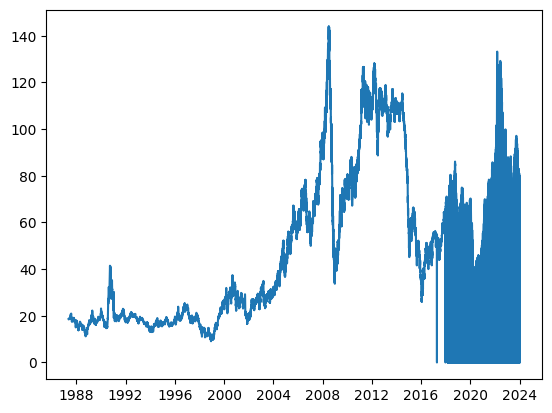

In [6]:
plt.plot(df_ipeadata.index, df_ipeadata.preco_petroleo)

In [7]:
df_ipeadata.sort_index(inplace= True)
period = int(len(df_ipeadata)/2)

In [8]:
resultados = seasonal_decompose(df_ipeadata, period = period, model = 'additive')

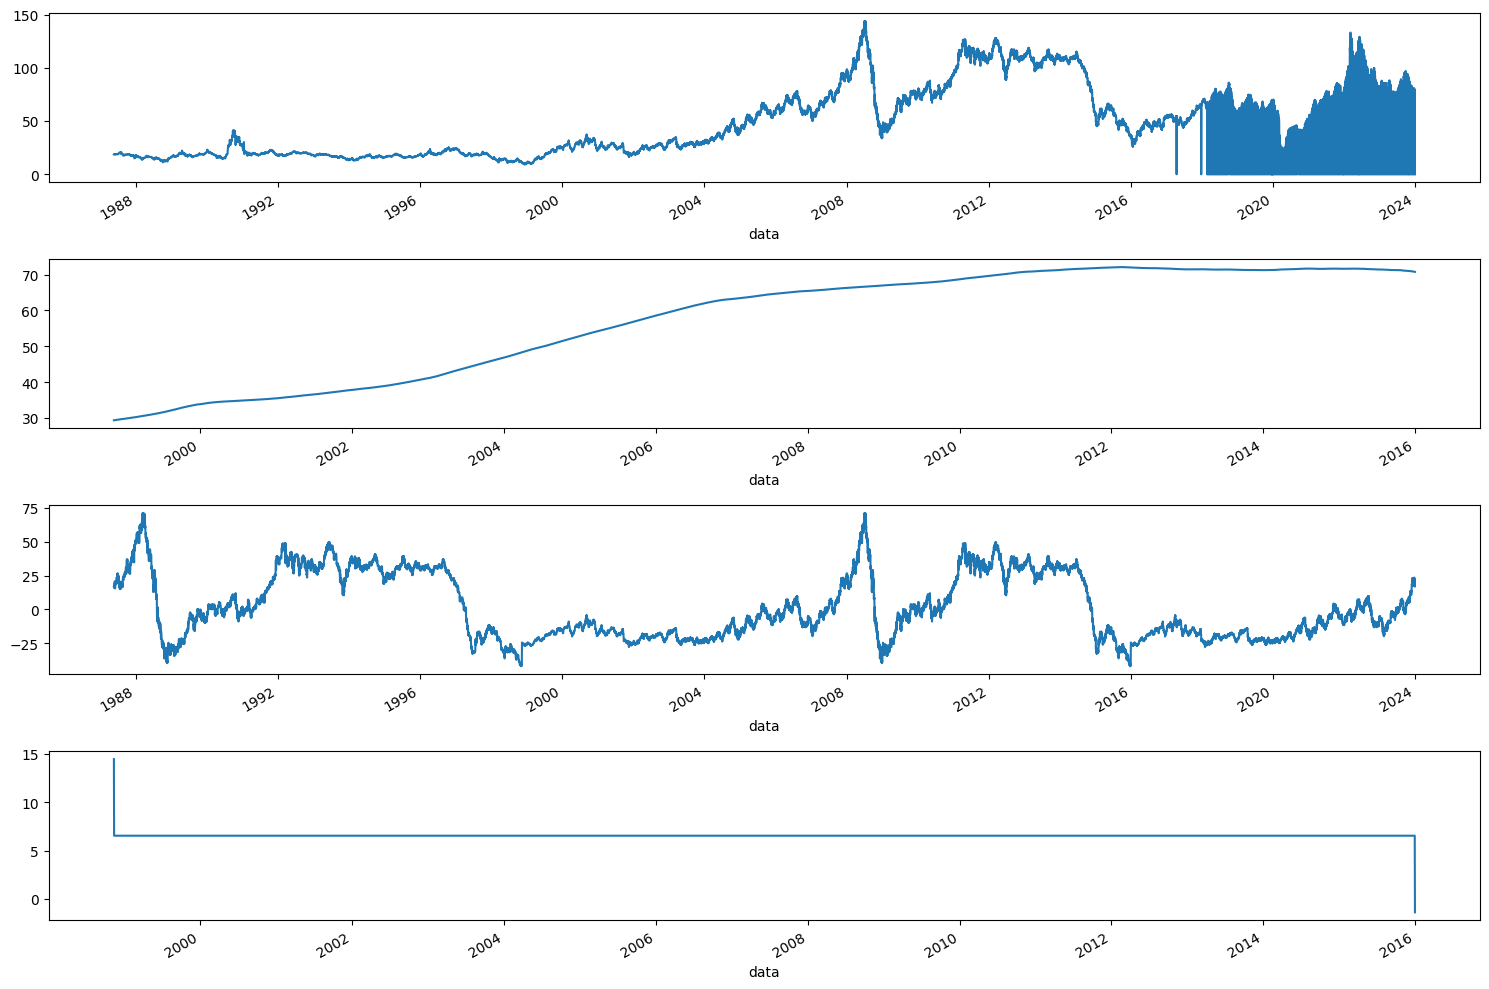

In [9]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize = (15,10))

resultados.observed.plot(ax=ax1)
resultados.trend.plot(ax=ax2)
resultados.seasonal.plot(ax=ax3)
resultados.resid.plot(ax=ax4)

plt.tight_layout()

In [10]:
sns.set_style('darkgrid')

In [11]:
X = df_ipeadata.preco_petroleo.values

In [12]:
result = adfuller(X)

print("Teste ADF")
print(f"Teste Estatístico: {result[0]}")
print(f"P-Value: {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
  print(f"\t{key}: {value}")

Teste ADF
Teste Estatístico: -2.1026031246168633
P-Value: 0.24346916118766626
Valores críticos:
	1%: -3.4309123060243385
	5%: -2.861788509653697
	10%: -2.566902276606688


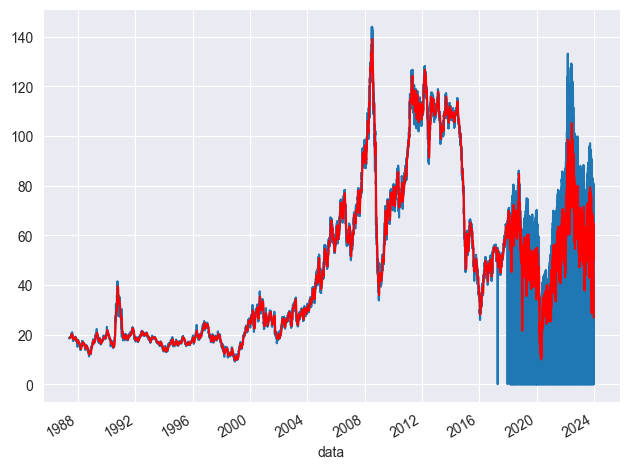

In [13]:
ma = df_ipeadata.rolling(12).mean()

f, ax = plt.subplots()
df_ipeadata.plot(ax=ax, legend=False)
ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


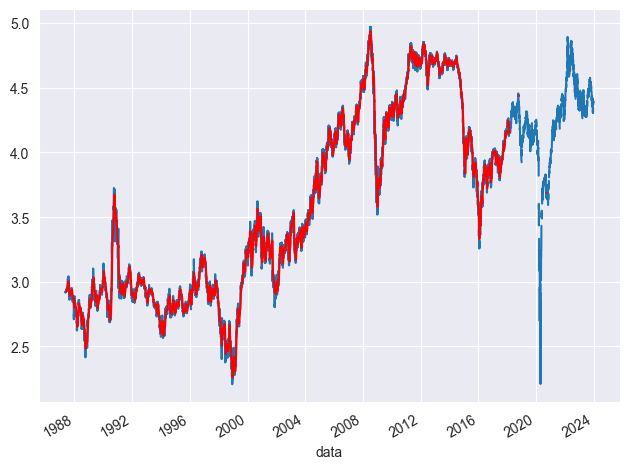

In [14]:
df_log = np.log(df_ipeadata)
ma_log = df_log.rolling(12).mean()

f, ax = plt.subplots()
df_log.plot(ax=ax, legend=False)
ma_log.plot(ax=ax, legend=False, color='r')
plt.tight_layout()

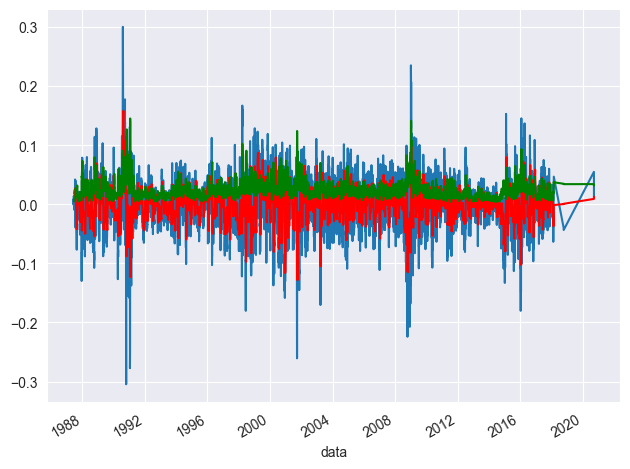

In [15]:
df_s = (df_log - ma_log).dropna()

ma_s = df_s.rolling(12).mean()

std = df_s.rolling(12).std()

f, ax = plt.subplots()
df_s.plot(ax=ax, legend=False)
ma_s.plot(ax=ax, legend=False, color='r')
std.plot(ax=ax, legend=False, color='g')
plt.tight_layout()


In [16]:
X_s = df_s.preco_petroleo.values
result_s = adfuller(X_s)

print("Teste ADF")
print(f"Teste Estatístico: {result_s[0]}")
print(f"P-Value: {result_s[1]}")
print("Valores críticos:")

for key, value in result_s[4].items():
  print(f"\t{key}: {value}")


Teste ADF
Teste Estatístico: -17.89294904230373
P-Value: 2.9729227172438506e-30
Valores críticos:
	1%: -3.431039477205773
	5%: -2.8618447060967434
	10%: -2.566932189953556


Teste ADF
Teste Estatístico: -24.255836522297663
P-Value: 0.0
Valores críticos:
	1%: -3.4310409341917047
	5%: -2.861845349919143
	10%: -2.566932532662396


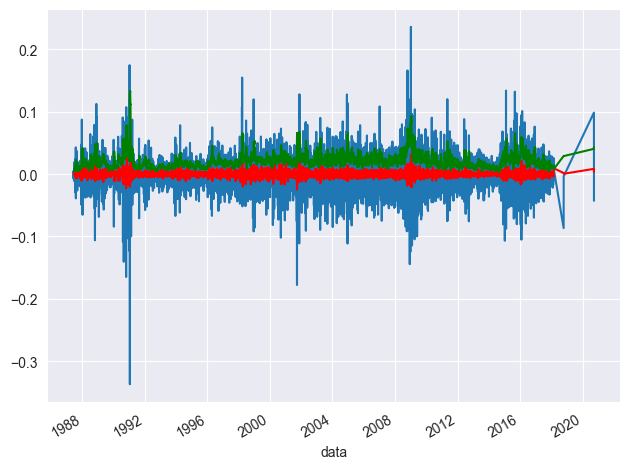

In [17]:
df_diff = df_s.diff(1)
ma_diff = df_diff.rolling(12).mean()

std_diff = df_diff.rolling(12).std()


f, ax = plt.subplots()
df_diff.plot(ax=ax, legend=False)
ma_diff.plot(ax=ax, legend=False, color='r')
std_diff.plot(ax=ax, legend=False, color='g')
plt.tight_layout()

X_diff = df_diff.preco_petroleo.dropna().values
result_diff = adfuller(X_diff)

print("Teste ADF")
print(f"Teste Estatístico: {result_diff[0]}")
print(f"P-Value: {result_diff[1]}")
print("Valores críticos:")

for key, value in result_diff[4].items():
  print(f"\t{key}: {value}")

In [18]:
lag_acf = acf(df_diff.dropna(), nlags=25)
lag_pacf = pacf(df_diff.dropna(), nlags=25)

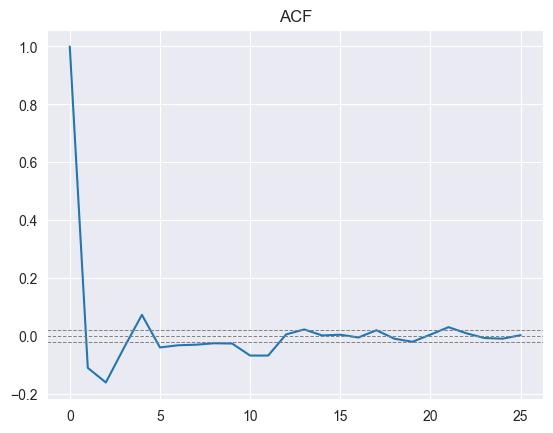

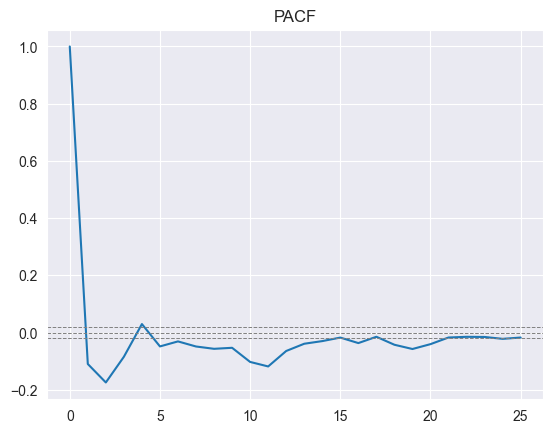

In [19]:
plt.plot(lag_acf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("ACF")
plt.show()

plt.plot(lag_pacf)

plt.axhline(y= -1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y=0, linestyle='--', color='gray',linewidth=0.7)
plt.axhline(y= 1.96/(np.sqrt((len(df_diff) -1))), linestyle='--', color='gray',linewidth=0.7)

plt.title("PACF")
plt.show()

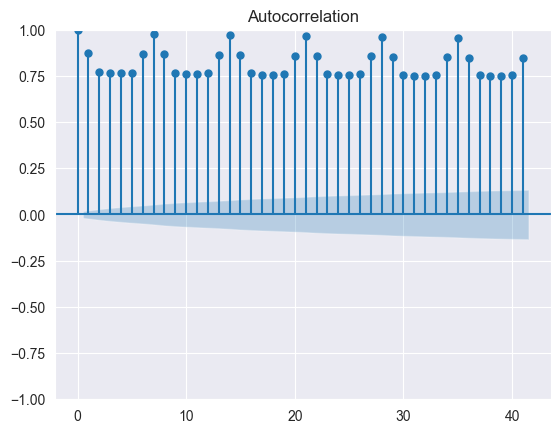

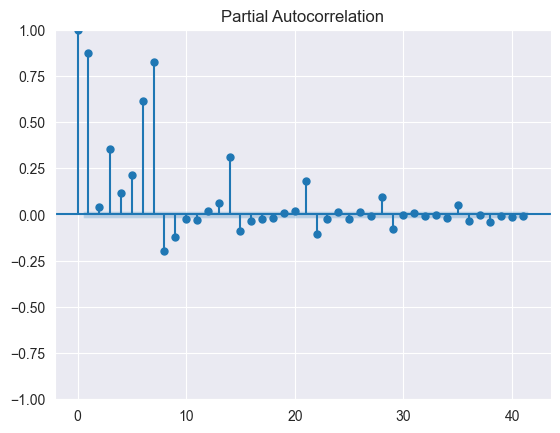

In [20]:
plot_acf(df_ipeadata.preco_petroleo)
plot_pacf(df_ipeadata.preco_petroleo)
plt.show()

In [21]:
df_arima["preco_petroleo"] = df_arima["preco_petroleo"].astype(float)
df_arima['id'] = 'ipea'
df_arima = df_arima.sort_values(by='data').reset_index(drop=True)

In [22]:
df_1 = df_arima.rename(columns={'data':'ds','preco_petroleo':'y','id':'unique_id'})

In [23]:
df_1

,ds,y,unique_id
0,1987-05-20,18.63,ipea
1,1987-05-21,18.45,ipea
2,1987-05-22,18.55,ipea
3,1987-05-25,18.60,ipea
4,1987-05-26,18.63,ipea
...,...,...,...
11665,2023-12-27,0.00,ipea
11666,2023-12-28,0.00,ipea
11667,2023-12-29,0.00,ipea
11668,2023-12-30,0.00,ipea


In [24]:
treino = df_1.loc[df_1['ds'] < '2023-06-01']
valid = df_1.loc[(df_1['ds'] >= '2023-06-01') & (df_1['ds'] < '2024-01-01')]
h = valid['ds'].nunique()

In [25]:
treino

,ds,y,unique_id
0,1987-05-20,18.63,ipea
1,1987-05-21,18.45,ipea
2,1987-05-22,18.55,ipea
3,1987-05-25,18.60,ipea
4,1987-05-26,18.63,ipea
...,...,...,...
11451,2023-05-27,0.00,ipea
11452,2023-05-28,0.00,ipea
11453,2023-05-29,0.00,ipea
11454,2023-05-30,73.38,ipea


In [26]:
h

214

In [27]:
def wmape(y_true, y_pred):
  return np.abs(y_true-y_pred).sum() / np.abs(y_true).sum()

c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 55.77%


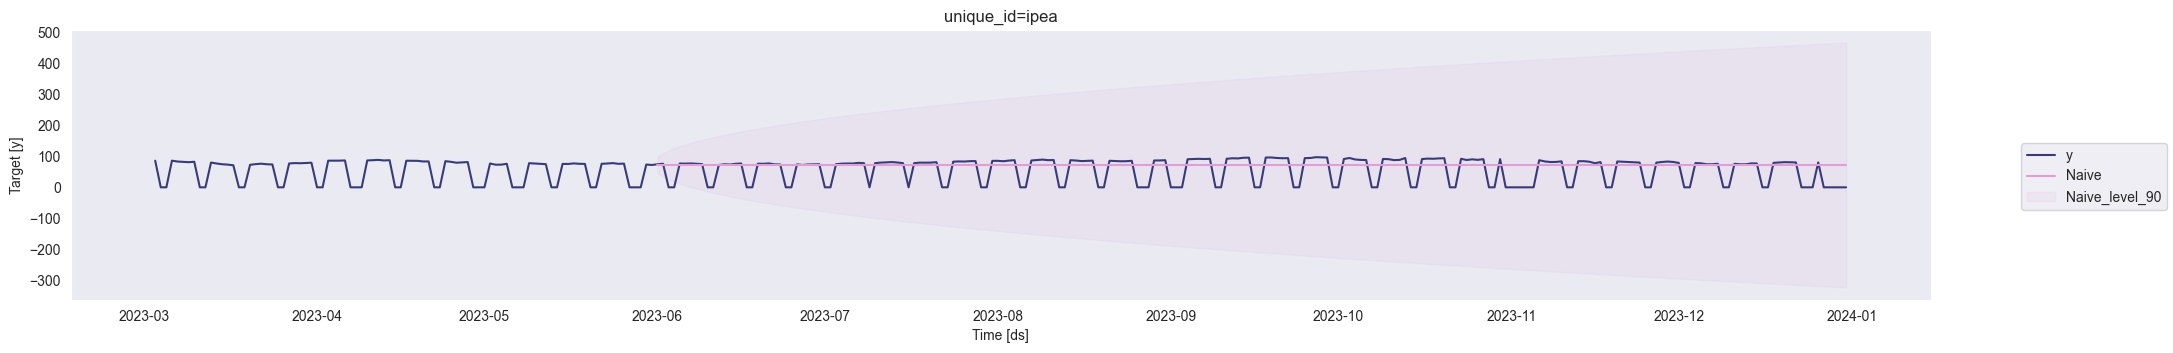

In [28]:
model = StatsForecast(models=[Naive()], freq='D', n_jobs=-1)
model.fit(treino)

forecast_df_naive = model.predict(h=h, level=[90])
forecast_df_naive = forecast_df_naive.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape_naive = wmape(forecast_df_naive['y'].values, forecast_df_naive['Naive'].values)
print(f"WMAPE: {wmape_naive:.2%}")

model.plot(treino, forecast_df_naive, level=[90], unique_ids=['ipea'],engine ='matplotlib', max_insample_length=90)

In [29]:
forecast_df_naive

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,y
0,ipea,2023-06-01,71.980003,45.004978,98.955032,74.18
1,ipea,2023-06-02,71.980003,33.831554,110.128448,76.00
2,ipea,2023-06-03,71.980003,25.257887,118.702118,0.00
3,ipea,2023-06-04,71.980003,18.029949,125.930054,0.00
4,ipea,2023-06-05,71.980003,11.662009,132.298004,76.61
...,...,...,...,...,...,...
209,ipea,2023-12-27,71.980003,-318.925262,462.885284,0.00
210,ipea,2023-12-28,71.980003,-319.854889,463.814911,0.00
211,ipea,2023-12-29,71.980003,-320.782318,464.742310,0.00
212,ipea,2023-12-30,71.980003,-321.707550,465.667572,0.00


c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 29.00%


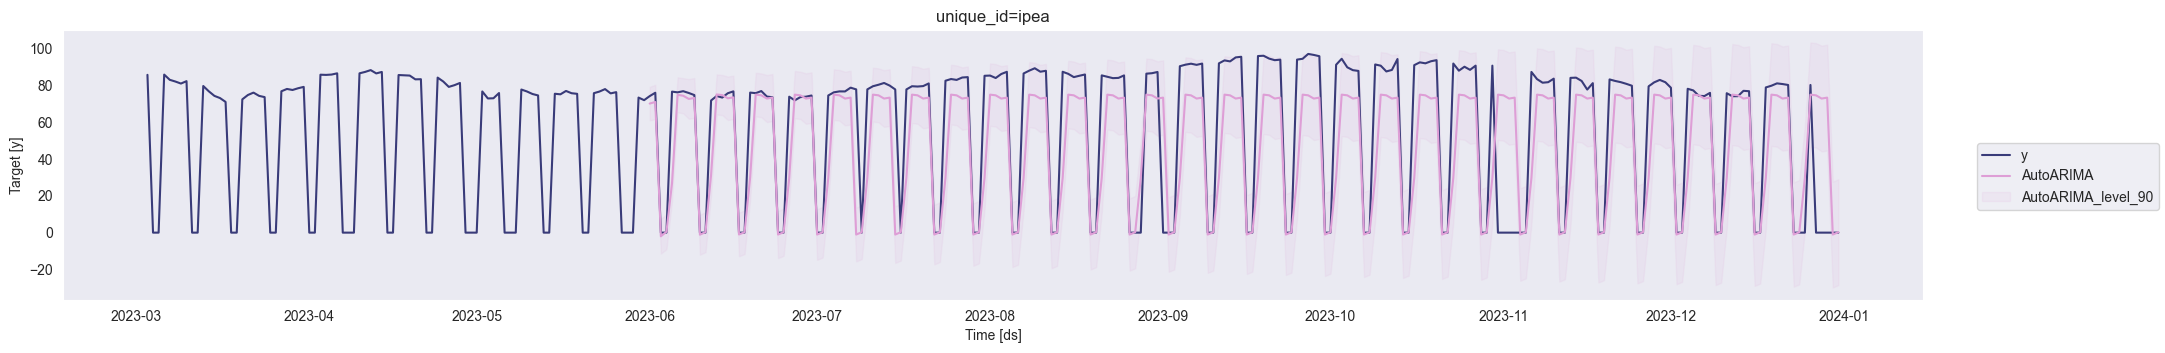

In [30]:
model = StatsForecast(models=[AutoARIMA(season_length=7)], freq='D', n_jobs=-1)
model.fit(treino)

forecast_dfArima = model.predict(h=h, level=[90])
forecast_dfArima = forecast_dfArima.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape1 = wmape(forecast_dfArima['y'].values, forecast_dfArima['AutoARIMA'].values)
print(f"WMAPE: {wmape1:.2%}")

model.plot(treino, forecast_dfArima, level=[90], unique_ids=['ipea'],engine ='matplotlib', max_insample_length=90)

In [31]:
forecast_dfArima

,unique_id,ds,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,y
0,ipea,2023-06-01,70.127586,61.032284,79.222885,74.18
1,ipea,2023-06-02,70.997406,61.649555,80.345261,76.00
2,ipea,2023-06-03,-1.991159,-11.405784,7.423465,0.00
3,ipea,2023-06-04,0.470947,-9.000864,9.942759,0.00
4,ipea,2023-06-05,26.788834,17.271559,36.306110,76.61
...,...,...,...,...,...,...
209,ipea,2023-12-27,74.601578,46.262730,102.940430,0.00
210,ipea,2023-12-28,72.845749,44.115177,101.576317,0.00
211,ipea,2023-12-29,73.353546,44.601078,102.106018,0.00
212,ipea,2023-12-30,-1.035095,-29.793451,27.723261,0.00


c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 34.84%


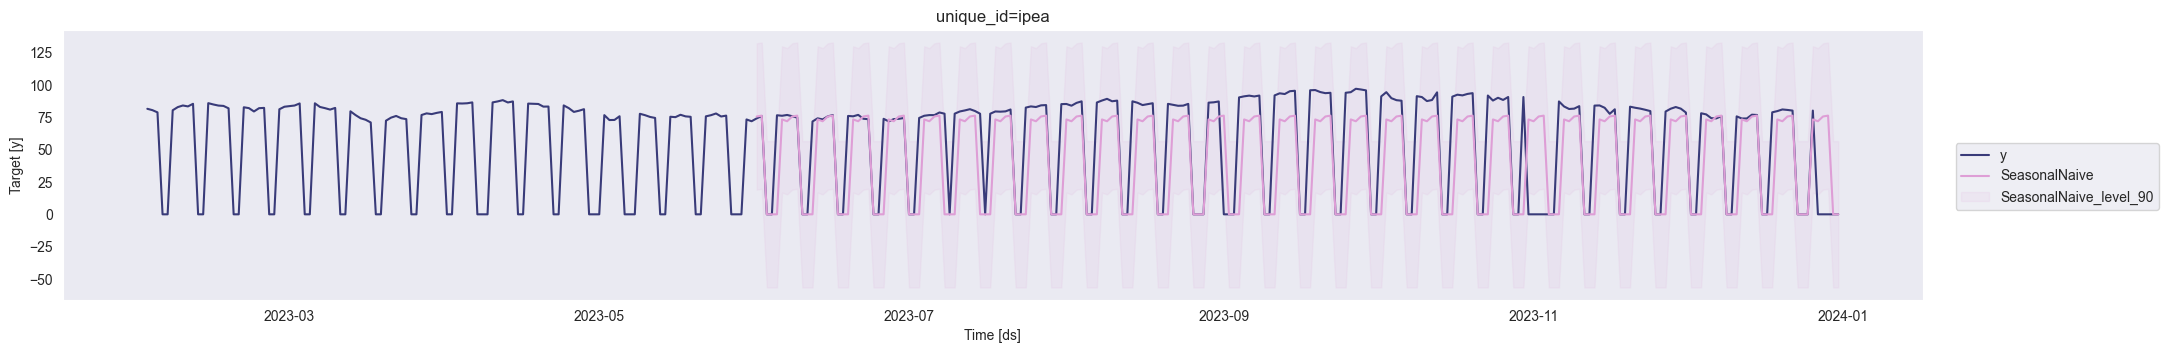

In [32]:
model_s = StatsForecast(models=[SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_s.fit(treino)

forecast_dfs = model_s.predict(h=h, level=[90])
forecast_dfs = forecast_dfs.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape2 = wmape(forecast_dfs['y'].values, forecast_dfs['SeasonalNaive'].values)
print(f"WMAPE: {wmape2:.2%}")

model_s.plot(treino, forecast_dfs, level=[90], unique_ids=['ipea'],engine ='matplotlib', max_insample_length=120)

In [33]:
forecast_dfs

,unique_id,ds,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
0,ipea,2023-06-01,75.660004,19.083925,132.236084,74.18
1,ipea,2023-06-02,76.330002,19.753923,132.906082,76.00
2,ipea,2023-06-03,0.000000,-56.576080,56.576080,0.00
3,ipea,2023-06-04,0.000000,-56.576080,56.576080,0.00
4,ipea,2023-06-05,0.000000,-56.576080,56.576080,76.61
...,...,...,...,...,...,...
209,ipea,2023-12-27,71.980003,15.403924,128.556076,0.00
210,ipea,2023-12-28,75.660004,19.083925,132.236084,0.00
211,ipea,2023-12-29,76.330002,19.753923,132.906082,0.00
212,ipea,2023-12-30,0.000000,-56.576080,56.576080,0.00


c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 25.81%


KeyError: 'SeasWA-lo-60'

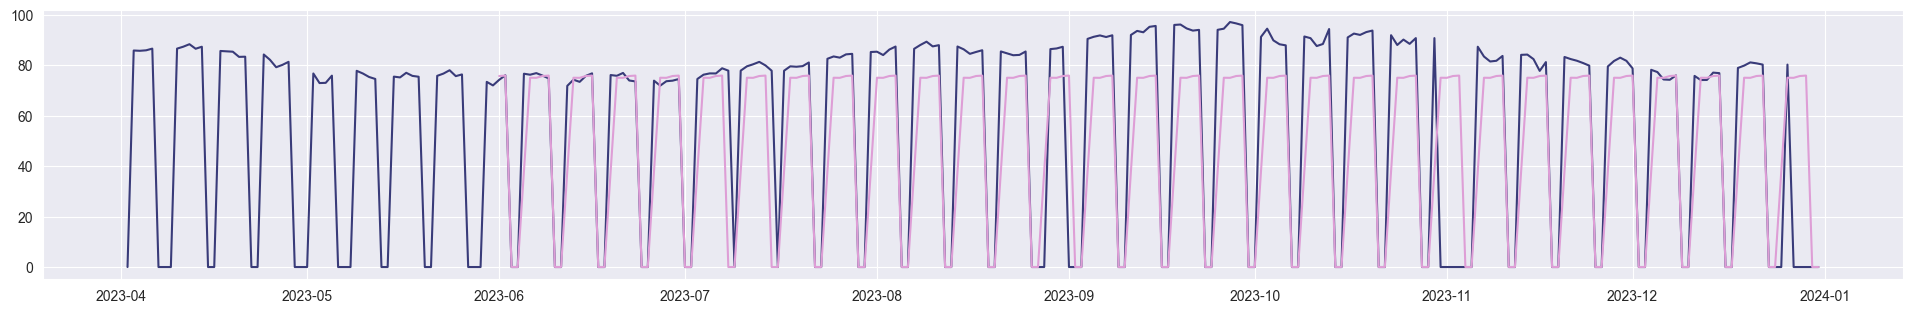

In [34]:
#model_sm = StatsForecast(models=[SeasonalWindowAverage(season_length=7, window_size=2)], freq='D', n_jobs=-1)
#model_sm.fit(treino)

#forecast_dfsm = model_sm.predict(h=h)
#forecast_dfsm = forecast_dfsm.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

#wmape3 = wmape(forecast_dfsm['y'].values, forecast_dfsm['SeasWA'].values)
#print(f"WMAPE: {wmape3:.2%}")

#model_sm.plot(treino, forecast_dfsm, level=[60], unique_ids=['ipea'],engine ='matplotlib', max_insample_length=60)

In [ ]:
#forecast_dfsm

,unique_id,ds,SeasWA,y
0,ipea,2023-06-01,75.705002,74.18
1,ipea,2023-06-02,75.875000,76.00
2,ipea,2023-06-03,0.000000,0.00
3,ipea,2023-06-04,0.000000,0.00
4,ipea,2023-06-05,37.884998,76.61
...,...,...,...,...
209,ipea,2023-12-27,74.985001,0.00
210,ipea,2023-12-28,75.705002,0.00
211,ipea,2023-12-29,75.875000,0.00
212,ipea,2023-12-30,0.000000,0.00


c:\Users\erich.buttner\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsforecast\core.py:417: FutureWarning: In a future version the predictions will have the id as a column. You can set the `NIXTLA_ID_AS_COL` environment variable to adopt the new behavior and to suppress this warning.
  warnings.warn(


WMAPE: 29.00%


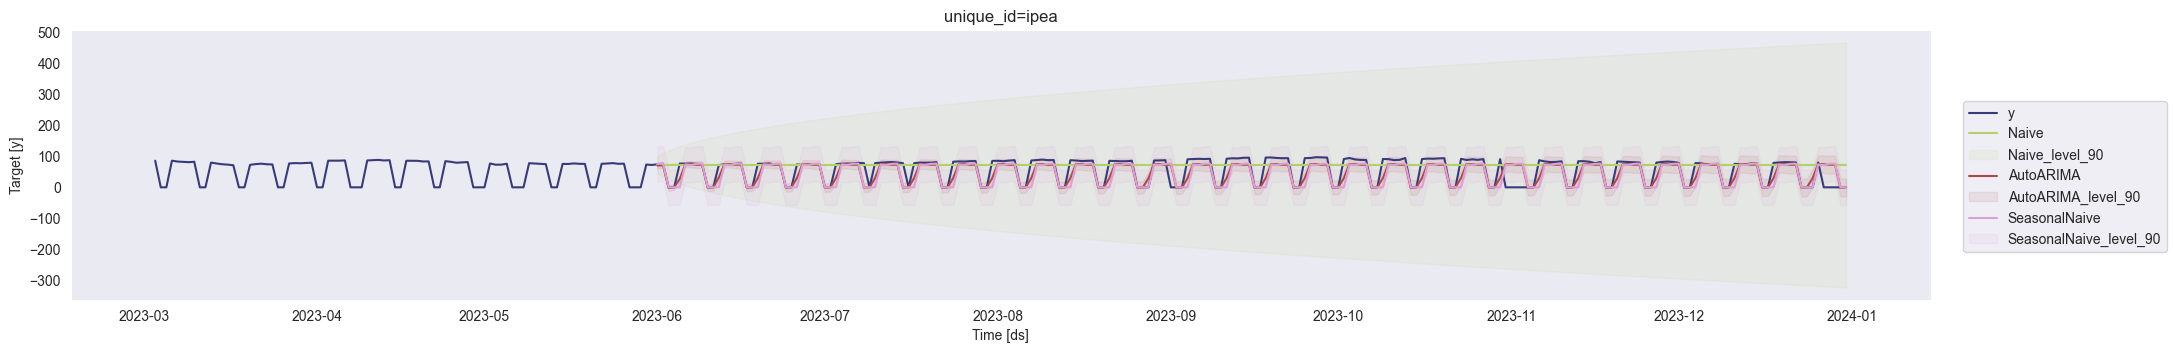

In [36]:
model_a = StatsForecast(models=[Naive(),AutoARIMA(season_length=7), SeasonalNaive(season_length=7)], freq='D', n_jobs=-1)
model_a.fit(treino)

forecast_dfa = model_a.predict(h=h, level=[90])
forecast_dfa = forecast_dfa.reset_index().merge(valid, on=['ds', 'unique_id'], how='left')

wmape4 = wmape(forecast_dfa['y'].values, forecast_dfa['AutoARIMA'].values)
print(f"WMAPE: {wmape4:.2%}")

model_a.plot(treino, forecast_dfa, level=[90], unique_ids=['ipea'],engine ='matplotlib', max_insample_length=90)

In [ ]:
forecast_dfa

,unique_id,ds,Naive,Naive-lo-90,Naive-hi-90,AutoARIMA,AutoARIMA-lo-90,AutoARIMA-hi-90,SeasonalNaive,SeasonalNaive-lo-90,SeasonalNaive-hi-90,y
0,ipea,2023-06-01,71.980003,45.004978,98.955032,70.127586,61.032284,79.222885,75.660004,19.083925,132.236084,74.18
1,ipea,2023-06-02,71.980003,33.831554,110.128448,70.997406,61.649555,80.345261,76.330002,19.753923,132.906082,76.00
2,ipea,2023-06-03,71.980003,25.257887,118.702118,-1.991159,-11.405784,7.423465,0.000000,-56.576080,56.576080,0.00
3,ipea,2023-06-04,71.980003,18.029949,125.930054,0.470947,-9.000864,9.942759,0.000000,-56.576080,56.576080,0.00
4,ipea,2023-06-05,71.980003,11.662009,132.298004,26.788834,17.271559,36.306110,0.000000,-56.576080,56.576080,76.61
...,...,...,...,...,...,...,...,...,...,...,...,...
209,ipea,2023-12-27,71.980003,-318.925262,462.885284,74.601578,46.262730,102.940430,71.980003,15.403924,128.556076,0.00
210,ipea,2023-12-28,71.980003,-319.854889,463.814911,72.845749,44.115177,101.576317,75.660004,19.083925,132.236084,0.00
211,ipea,2023-12-29,71.980003,-320.782318,464.742310,73.353546,44.601078,102.106018,76.330002,19.753923,132.906082,0.00
212,ipea,2023-12-30,71.980003,-321.707550,465.667572,-1.035095,-29.793451,27.723261,0.000000,-56.576080,56.576080,0.00
